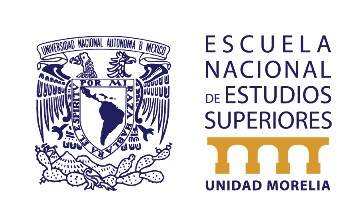
<h2><center>Licenciatura en Tecnologías para la Información en Ciencias</center></h2>
<h2><center>Sistemas basados en conocimiento</center></h2>
<h2><center>Proyecto final</center></h2>
<h2><center>Luis David Huante García</center></h2>

## Descripción del proyecto

<div style="text-align: justify"> Hoy en día, la depresión es una problemática muy presente en la sociedad actual. Diversos factores de índole social, cultural, económica, entre otros, influyen fuertemente en la posibilidad de diferentes sectores poblacionales de generar depresión. En este proyecto se analizará un conjunto de datos que contiene diversas métricas concernientes a las condiciones de vida de las personas que viven en zonas rurales y la relación que tienen con la depresión. A través de la comparación de las diferentes características (sexo, ingresos, gastos,  número de hijos, etc) que presentan las personas del sector rural, podemos inferir cuáles de ellas tendrán depresión a partir de la aplicación de 2 de los distintos métodos de aprendizaje automático, para posteriormente comparar resultados entre sí y elegir al más apto dados los datos.</div>

## Herramientas y metodología 

<div style="text-align: justify">Se utilizará un <a href="https://www.kaggle.com/datasets/diegobabativa/depression"> conjunto de datos</a> extraído de Kaggle, que contiene los atributos de ID de encuesta, ID de ciudad, Sexo, Edad, Estado marital, Nivel de eduación, Número de niños, Total de miembros de familia, Ganado activo, Activos duraderos, Activos seguros, Gastos de manutención, Otros gastos, Salario entrante, Salario propio de granja, Salario propio de negocio, Salario externo, Salario de agricultura, Gastos de granja, Mercado laboral primario, Inversiones duraderas, Inversiones no duraderas y Estatus de depresión. </div>

El conjunto de datos tiene 23 columnas o dimensiones y un total de 1432 filas u objetos.

Se utlizarán Python y sus siguientes librerías:
1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn
5. ScikitLearn


## Código

In [1]:
#Pandas
import pandas as pd

#NumPy
import numpy as np

#PyPlot y Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

##SciKitLearn para generar reportes
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("Depression_Dataset.csv")
df

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


Eliminamos las columnas de ID, ya que no proveen de ninguna utilidad al análisis.

In [3]:
df = df.drop(["Survey_id", "Ville_id"], axis = 1)

Hay un dato de tipo NaN en la columna de `no_lasting_investmen`, así que lo eliminamos.

In [4]:
df.dropna(inplace=True)

Comprobamos que no tengamos más datos que limpiar o que provoquen errores en nuestro análisis.

In [5]:
df.nunique()

sex                        2
Age                       69
Married                    2
Number_children           12
education_level           18
total_members             12
gained_asset             440
durable_asset            584
save_asset               266
living_expenses          408
other_expenses           608
incoming_salary            2
incoming_own_farm          2
incoming_business          2
incoming_no_business       2
incoming_agricultural    330
farm_expenses            694
labor_primary              2
lasting_investment       965
no_lasting_investmen     939
depressed                  2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    1409 non-null   int64  
 1   Age                    1409 non-null   int64  
 2   Married                1409 non-null   int64  
 3   Number_children        1409 non-null   int64  
 4   education_level        1409 non-null   int64  
 5   total_members          1409 non-null   int64  
 6   gained_asset           1409 non-null   int64  
 7   durable_asset          1409 non-null   int64  
 8   save_asset             1409 non-null   int64  
 9   living_expenses        1409 non-null   int64  
 10  other_expenses         1409 non-null   int64  
 11  incoming_salary        1409 non-null   int64  
 12  incoming_own_farm      1409 non-null   int64  
 13  incoming_business      1409 non-null   int64  
 14  incoming_no_business   1409 non-null   int64  
 15  inco

### Exploración de los datos

In [7]:
df['depressed'].value_counts()


0    1174
1     235
Name: depressed, dtype: int64

Podemos ver que hay 1174 personas que no presentan depresión y 235 que sí lo hacen.

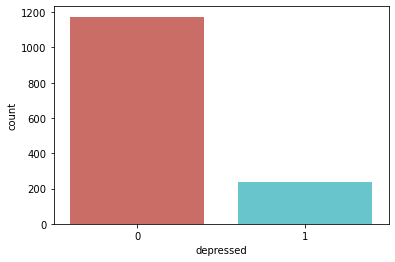

In [8]:
sns.countplot(x='depressed',data=df,palette='hls')
plt.savefig('count_plot')
plt.show()

Ahora contabilizamos la cantidad de deprimidos por su sexo.

Text(0, 0.5, 'Cantidad de personas deprimidas')

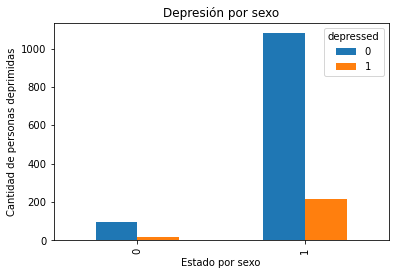

In [9]:
pd.crosstab(df.sex,df.depressed).plot(kind='bar')
plt.title('Depresión por sexo')
plt.xlabel('Estado por sexo')
plt.ylabel('Cantidad de personas deprimidas')


Finalmente, definimos nuestra función para normalizar para comenzar la predicción

In [10]:
def normalize(data):
    return [(x-min(data))/(max(data)-min(data)) for x in data]

In [11]:
for d in df.columns.values:
    df[d] = normalize(df[d].astype(float))

### KNN

In [12]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X = df.drop(['depressed'], axis=1)
y = df['depressed']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Después de dividir los datos, tomamos el 0,8 % de los datos para entrenamiento y el resto para  prueba.
Ahora debemos encontrar el valor óptimo de k.

Error mínimo: 0.1453900709219858 en K = 9


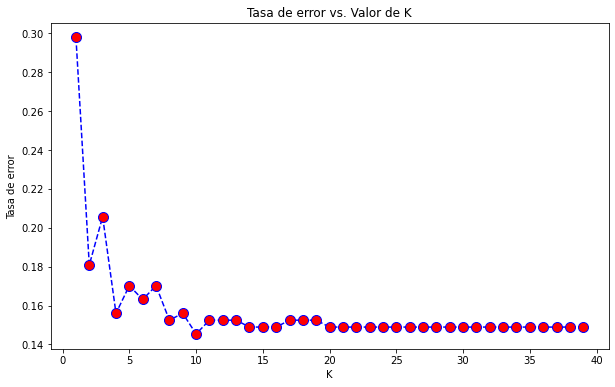

In [15]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Tasa de error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de error')
print("Error mínimo:",min(error_rate),"en K =",error_rate.index(min(error_rate)))
plt.savefig('errork.png')

De la gráfica, podemos ver que el error más pequeño que obtuvimos es 0.14 en K=9. A continuación, podemos ver el gráfico comparando Accuracy y el valor de K.

Maximum accuracy: 0.8546099290780141 at K = 9


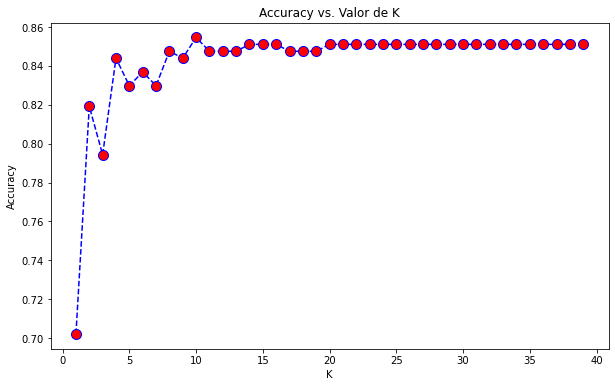

In [16]:
accuracy = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(accuracy),"at K =",accuracy.index(max(accuracy)))
plt.savefig('accuracyk.png')

Con los resultados obtenidos, es decir,con la accuracy de 85% en K=9 podemos definir ese valor como K. Siempre es mejor una K un poco más grande para evitar problemas como el sobreajuste, por lo que en este caso se elegirá a K como 9,  obteniendo una mejor eficiencia para ese valor de K.

In [17]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [18]:
y_pred = classifier.predict(X_test)

Obtenemos nuestro reporte de clasificación, la matriz de confusión y la puntuación de Accuracy.

In [19]:
print("            Matriz de confusión")
print(confusion_matrix(y_test, y_pred))
print("_"*60)
print("         Reporte de clasificación")
print(classification_report(y_test, y_pred))
print("_"*60)
print("         Valor de Accuracy final")
print(accuracy_score(y_test, y_pred))

            Matriz de confusión
[[236   4]
 [ 40   2]]
____________________________________________________________
         Reporte de clasificación
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       240
         1.0       0.33      0.05      0.08        42

    accuracy                           0.84       282
   macro avg       0.59      0.52      0.50       282
weighted avg       0.78      0.84      0.79       282

____________________________________________________________
         Valor de Accuracy final
0.8439716312056738


 Tras analizar en la gráfica los posibles valores para K, el número con el cual se alcanzó el mayor balance fue 9. A partir de este valor de K, disminuía drásticamente el error. Aunque este mantiene en un margen de 18%, debemos optar por encontrar el equilibrio y minimizarlo sin afectar otras variables. Se alcanzó un porcentaje de Accuracy de entre el 82% y el 84%.


### Regresión Logística

Ahora haremos la comparación de los resultados del modelo con regresión logística. Para aplicar regresión logística, debemos cambiar algunas cosas en el conjunto de datos. A pesar de que todas las columnas son numéricas, los datos aún no están listos para construir el modelo. Se necesita convertir la variable categórica a binarias. (get_dummies-Variables ficticias) 

In [20]:
df_aux = df.drop(['depressed'], axis=1)
df_N = pd.get_dummies(df_aux, columns=['education_level'])

In [21]:
X = df_N
y = df['depressed']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

Tenemos un Accuracy Score de 85.26%. Mayor que el conseguido en K Nearest Neighbors.

In [25]:
print(accuracy_score(y_test, y_pred))

0.8526912181303116


Obtenemos nuestro reporte de clasificación, la matriz de confusión y la puntuación de Accuracy.

In [26]:
print("            Matriz de confusión")
print(confusion_matrix(y_test, y_pred))
print("_"*60)
print("         Reporte de clasificación")
print(classification_report(y_test, y_pred))
print("_"*60)
print("         Valor de Accuracy final")
print(accuracy_score(y_test, y_pred))

            Matriz de confusión
[[301   0]
 [ 52   0]]
____________________________________________________________
         Reporte de clasificación
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       301
         1.0       0.00      0.00      0.00        52

    accuracy                           0.85       353
   macro avg       0.43      0.50      0.46       353
weighted avg       0.73      0.85      0.78       353

____________________________________________________________
         Valor de Accuracy final
0.8526912181303116


C:\Users\ldhua\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


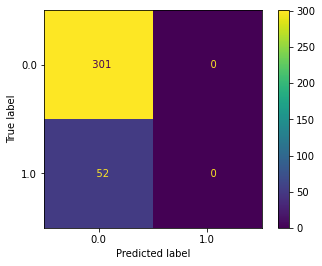

In [27]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_reg, X_test, y_test, values_format='5g')
plt.show()

En este caso, el modelo no identifica a nadie como propenso a la depresión mientras que marca a 52 personas como sanas que no lo son. La última circunstancia tampoco es muy buena. Se tenía un total de 52 casos de depresión, de los cuales el modelo no encontró ninguno. Se consiguió un Accuracy Score final de 85.26%.

Sin embargo, ya está claro que el modelo está sub-ajustado, ya que presentó un resultado débil en las métricas. Podemos atribuir este subajuste a otro problema: la cantidad insuficiente de datos o incluso que el número de características es mayor que el número de objetos.

Finalmente, se consiguió un Accuracy Score final de 85.26%

## Conclusiones

Tras haber analizado y obtenido los resultados de los dos métodos, es notable la diferencia entre ambos modelos. Primeramente, el análisis realizado con K Nearest Neighbors dió un Accuracy Score más alto que el conseguido con Regresión Logística. Estos resultados se consiguieron a través de un proceso de exploración, limpieza y formateado de datos, en los cuales se consiguió el conjunto que iba a utilizarse con los métodos de clasificación. Los datos venían casi listos para utilizar, por lo que sólo fue necesario eliminar una instancia con datos faltantes. Al empezar el análisis con K Nearest Neighbors, primero se realizó una gráfica para visualizar los valores de K con los que se podía conseguir mejores resultados. La gráfica resultó ampliamente útil para observar el comportamiento del error conforme aumentaba K, y al final el valor más óptimo fue K = 9. Esto llevó a un valor de Accuracy del 82.26%.



En contraste, al realizar el análisis con Regresión Logística, se obtuvieron resultados ligeramente mejores. Se llegó a una Accuracy de 85.26%. Analizando la matriz de confusión, se puede deducir que el modelo está sub-ajustado, ya que presentó un resultado débil en las métricas. Sin embargo, podemos atribuir este subajuste a problemas: la cantidad insuficiente de datos o incluso que el número de características es mayor que el número de objetos, lo cual al final se traduce en un desajuste en la función sigmoide, es decir la función logística.

A pesar de que ambos modelos no se desempeñaron a la perfección, sí hubo diferencias entre ellos, siendo el de Regresión Logística el más óptimo para la tarea dados los datos proporcionados. Podemos atribuir las limitantes de los resultados a factores como el número de datos, la condición de las variables, y en general al conjunto de datos, ya que un modelo es tan bueno como los datos se lo permitan. Finalmente, se define a Regresión Logísitca como el modelo ganador. Este proyecto resultó  muy útil para reforzar los conocimientos matemáticos y de programación implicados en el aprendizaje automático, así como para apreciar los conjuntos de datos en los que estos métodos pueden ser aplicados, ya que las posibilidades y el potencial del aprendizaje es muy vasto.

## Referencias

1. N/A. (2021). pandas documentation mayo 28, 2022, de Pandas Sitio web: https://pandas.pydata.org/docs/#
2. N/A. (2021). scikit-learn documentation mayo 28, 2022, de SciKit-Learn Sitio web: https://scikit-learn.org/stable/index.html
3. Babativa, D. (2019) Depression mayo 28, 2022, de Kaggle Sitio Web: https://www.kaggle.com/datasets/diegobabativa/depression